In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import time

In [2]:
def rsvd(A, k):
    m, n = A.shape
    omega = np.random.randn(n, k)
    Y = A @ omega
    Q, R = scipy.linalg.qr(Y, check_finite=False, mode='economic')
    B = Q.conj().T @ A
    Uhat, Sigma, V = scipy.linalg.svd(B, full_matrices=False, check_finite=False)
    U = Q @ Uhat
    return U, Sigma, V

In [3]:
def A(i, j):
    return 1.0/(i+j+1)

In [4]:
M = 1500
N = 1024
x = np.linspace(1,N,N)
r = 20
Ma=np.fromfunction(A, [M, N])

In [6]:
start = time.time()
U, s, V = np.linalg.svd(Ma)
Ut = U[ :, : r]
st = s[ : r]
Vt = V[ : r, :]
print(f'Classical:\nerr = {np.linalg.norm(Ma - Ut @ np.diag(st) @ Vt)}')
print(f'time = {time.time() - start} sec')

Classical:
err = 9.391032008644887e-11
time = 1.99263596534729 sec


In [7]:
start = time.time()
Ur, sr, Vr = rsvd(Ma, k=r)
print(f'Randomized:\nerr = {np.linalg.norm(Ma - Ur @ np.diag(sr) @ Vr)}')
print(f'time = {time.time() - start} sec')

Randomized:
err = 2.8375053596674266e-10
time = 0.04209613800048828 sec


In [9]:
def test_classic(A, rank):
    start = time.time()
    U, s, V = np.linalg.svd(A)
    t = time.time() - start
    Ut = U[ :, : rank]
    st = s[ : rank]
    Vt = V[ : rank, :]
    err = np.linalg.norm(Ma - Ut @ np.diag(st) @ Vt)
    return err, t

In [10]:
def test_random(A, rank):
    start = time.time()
    Ur, sr, Vr = rsvd(A, k=rank)
    t = time.time() - start
    err = np.linalg.norm(Ma - Ur @ np.diag(sr) @ Vr)
    return err, t

In [12]:
errs_classic = []
errs_random = []
time_classic = []
time_random = []
for i in range(1, 21):
    err1, t1 = test_classic(Ma, i)
    err2, t2 = test_random(Ma, i)
    errs_classic.append(err1)
    errs_random.append(err2)
    time_classic.append(t1)
    time_random.append(t2)

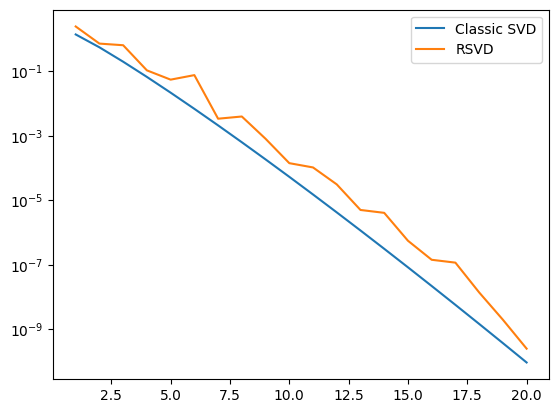

In [16]:
plt.plot(range(1, 21), errs_classic, label='Classic SVD')
plt.plot(range(1, 21), errs_random, label='RSVD')
plt.yscale('log')
plt.legend()